# Predicting GPA from SAT score

![Screenshot](front_page.png)

This challenge was my very first kaggle (private) competition that I did with my classmates in the beginning of the Fundamentals of Data Science course. I was barely learning how to code at that time.

The SAT is a test widely used for college admission in USA. People think that students that achieve high score in SAT, have also the highest GPA during college. In this competition we want to predict the average GPA cumulated by a student in the college, based only on the scores that he/she achieved in SAT.
You are given a training dataset, in which each row contain the student ID, SAT score and average GPA cumulated during college. Use this dataset for training your model and then test your model using test dataset. Each row of test dataset contain student ID and SAT score. The resulting CSV file contains the student ID and predicted GPA score for each row of the test dataset. 

The implemented algorithm is the Gradient Descent, written from scratch.

## Acknowledgements
Data are part of datasets published on StatCrunch website, exactly in the following URL: https://www.statcrunch.com/app/index.php?dataid=1583665. 

In [1]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def compute_cost(X, y, theta):
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = zeros(shape=(num_iters, 1))
    for i in range(num_iters):
        predictions = X.dot(theta).flatten()
        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]
        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()
        J_history[i, 0] = compute_cost(X, y, theta)
    return theta, J_history

The computational cost is: 5.31246805813
Theta values are:
[[  2.91717776e-06]
 [  2.97041436e-03]]


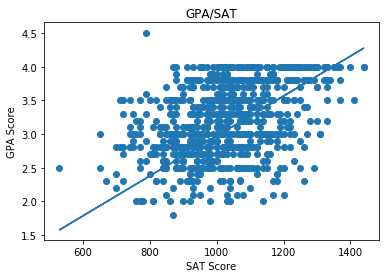

In [2]:
data=pd.read_csv('training.csv',delimiter=',')
X = data["SAT"]
y = data["GPA"]

m = y.size
it = ones(shape=(m, 2)) 
it[:, 1] = X 

theta = zeros(shape=(2, 1))
iterations = 1500
alpha = 0.000000002

print 'The computational cost is:', compute_cost(it, y, theta)  #

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

print 'Theta values are:'      
print theta    

result = it.dot(theta).flatten()
plt.scatter(data["SAT"],data["GPA"],marker='o')
title('GPA/SAT')
xlabel('SAT Score')
ylabel('GPA Score')
plot(data["SAT"], result)
show()

In [3]:
from decimal import *
data=pd.read_csv('testfile.csv',delimiter=',')
X=data["SAT"]
vet=ones(X.shape[0])
y=theta[0][0]*vet+theta[1][0]*X
y=[float(Decimal("%.1f" % i)) for i in y]
y=pd.DataFrame({'ID':data.ix[:,0],'GPA':y})
y1=y.set_index('ID')
y1.to_csv('satgpa.csv')
print y

     GPA   ID
0    2.6  801
1    2.8  802
2    2.7  803
3    3.3  804
4    2.2  805
5    3.2  806
6    2.9  807
7    2.9  808
8    2.7  809
9    3.1  810
10   2.5  811
11   2.9  812
12   2.7  813
13   3.2  814
14   2.4  815
15   2.5  816
16   2.5  817
17   3.3  818
18   3.1  819
19   3.4  820
20   3.1  821
21   3.0  822
22   3.2  823
23   3.0  824
24   3.8  825
25   3.0  826
26   2.7  827
27   2.7  828
28   3.1  829
29   2.5  830
..   ...  ...
169  2.6  970
170  2.8  971
171  3.1  972
172  3.4  973
173  2.2  974
174  3.1  975
175  3.0  976
176  2.7  977
177  2.9  978
178  2.6  979
179  2.1  980
180  2.9  981
181  3.4  982
182  3.3  983
183  2.6  984
184  3.5  985
185  3.5  986
186  2.9  987
187  3.0  988
188  3.1  989
189  3.0  990
190  4.2  991
191  2.6  992
192  3.4  993
193  3.1  994
194  3.0  995
195  3.2  996
196  3.4  997
197  3.6  998
198  2.8  999

[199 rows x 2 columns]


/home/alessandro/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
